In [143]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pandas_profiling
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns

import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## Load the datasets

In [144]:
train_demographics=pd.read_csv('traindemographics.csv')
train_performance=pd.read_csv('trainperf.csv')
train_previous_loans=pd.read_csv('trainprevloans.csv')
test_previous_loan=pd.read_csv('testprevloans.csv')
test_demographics=pd.read_csv('testdemographics.csv')
test_performance=pd.read_csv('testperf.csv')
submit=pd.read_csv("SampleSubmission (1).csv")
print('finished loading csv')

finished loading csv


In [145]:
test_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [146]:
train_performance.sort_values(by="customerid").head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
435,8a1088a0484472eb01484669e3ce4e0b,301999397,2,2017-07-27 19:44:08.000000,2017-07-27 18:44:00.000000,10000.0,11500.0,15,NaN,Bad
2689,8a1a1e7e4f707f8b014f797718316cad,301997672,5,2017-07-26 20:01:54.000000,2017-07-26 19:01:46.000000,30000.0,39000.0,60,NaN,Good
3299,8a1a32fc49b632520149c3b8fdf85139,301976551,8,2017-07-13 19:22:15.000000,2017-07-13 18:22:05.000000,20000.0,24500.0,30,NaN,Good
3144,8a1eb5ba49a682300149c3c068b806c7,301975382,9,2017-07-13 00:34:03.000000,2017-07-12 23:33:54.000000,30000.0,39000.0,60,NaN,Good
126,8a1edbf14734127f0147356fdb1b1eb2,301979352,3,2017-07-15 16:02:04.000000,2017-07-15 15:01:56.000000,10000.0,11500.0,15,NaN,Good


In [147]:
train_previous_loans.sort_values(by="customerid").head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
1893,8a1088a0484472eb01484669e3ce4e0b,301960241,1,2017-07-02 19:19:01.000000,2017-07-02 18:17:53.000000,10000.0,11500.0,15,2017-07-24 20:50:43.000000,NaN,2017-07-18 00:00:00.000000,2017-07-24 20:40:34.000000
17546,8a1a1e7e4f707f8b014f797718316cad,301632940,2,2016-06-15 11:22:38.000000,2016-06-15 10:22:32.000000,10000.0,13000.0,30,2016-07-15 13:59:02.000000,NaN,2016-07-15 00:00:00.000000,2016-07-15 13:43:58.000000
7999,8a1a1e7e4f707f8b014f797718316cad,301916386,3,2017-05-23 14:21:42.000000,2017-05-23 13:20:30.000000,20000.0,24500.0,30,2017-06-21 21:58:00.000000,NaN,2017-06-22 00:00:00.000000,2017-06-21 21:47:51.000000
16602,8a1a1e7e4f707f8b014f797718316cad,301947045,4,2017-06-21 22:09:51.000000,2017-06-21 21:09:44.000000,30000.0,39000.0,60,2017-07-26 19:48:11.000000,NaN,2017-07-21 00:00:00.000000,2017-07-20 15:05:33.000000
5216,8a1a1e7e4f707f8b014f797718316cad,301620412,1,2016-05-13 15:29:37.000000,2016-05-13 14:29:31.000000,10000.0,13000.0,30,2016-06-15 00:03:33.000000,NaN,2016-06-13 00:00:00.000000,2016-06-14 10:41:13.000000


In [148]:
test_performance.customerid.value_counts().head(10)

8a858f005cc5df15015cc5eb75d00970    1
8a858ea85c58de66015c594fe5612ddb    1
8a858e69566ae5b801568eb3041a121a    1
8a858e6a5bfd4b54015c0e8431373c5e    1
8a858ee755a0c84a0155a77bd775235f    1
8a858f305c8dd672015c93b1db645db4    1
8a858fa5552add5d0155452401244051    1
8a858ea45b35639b015b38bc0dd21bd8    1
8a8589a453d0b8850153d7410291589f    1
8a8588c7541e2f4b01541e3a48830105    1
Name: customerid, dtype: int64

In [149]:
test_previous_loan.customerid.value_counts().head(10)

8a858ff554e290e10154fe4e6b3f648c    33
8a858fdd54d4dd160154e1edcb6d7596    20
8a8588d653a915270153ab10232e304f    18
8a858f1554e29449015505ceef786df0    18
8a858966538deb190153957484683e67    17
8a858966538deb190153a3e3cce916e9    16
8a858f03582604ff01582a09d5a32c12    16
8a858957536752f3015375ad08686045    16
8a8589da5410287f01541a012bf23abb    16
8a858e17562dc2270156312c4a755edc    15
Name: customerid, dtype: int64

In [150]:
train_demographics[train_demographics['customerid'].duplicated(keep=False)].sort_values('customerid')
train_demographics = train_demographics.drop_duplicates(subset='customerid', keep='first', inplace=False)
train_demographics.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


## Merge the Datasets

In [151]:
train_demographics['set'] = 'train'
test_demographics['set'] = 'test'
train_performance['set'] = 'train'
test_performance['set'] = 'test'
train_previous_loans['set'] = 'train'
test_previous_loan['set'] = 'test'

In [152]:
Tdemographics=pd.concat([train_demographics,test_demographics] ,ignore_index = True, sort = False)
Tperfomance=pd.concat([train_performance,test_performance], ignore_index = True, sort = False)
Tprevious=pd.concat([train_previous_loans,test_previous_loan], ignore_index = True, sort = False)


In [153]:
print(Tdemographics.shape,Tperfomance.shape,Tprevious.shape)

(5821, 10) (5818, 11) (24090, 13)


In [154]:
Tprevious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24090 entries, 0 to 24089
Data columns (total 13 columns):
customerid         24090 non-null object
systemloanid       24090 non-null int64
loannumber         24090 non-null int64
approveddate       24090 non-null object
creationdate       24090 non-null object
loanamount         24090 non-null float64
totaldue           24090 non-null float64
termdays           24090 non-null int64
closeddate         24090 non-null object
referredby         1351 non-null object
firstduedate       24090 non-null object
firstrepaiddate    24090 non-null object
set                24090 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 2.4+ MB


In [155]:
##convert date columns to date time

In [156]:
Tprevious.approveddate=pd.to_datetime(Tprevious.approveddate)

In [157]:
Tprevious.creationdate=pd.to_datetime(Tprevious.creationdate)

In [158]:
Tprevious.closeddate=pd.to_datetime(Tprevious.closeddate)

## Descriptive analytics

#### Extract features from Tprevious

get profit per user

In [159]:
Tprevious['profit']=Tprevious['totaldue']-Tprevious['loanamount']

In [160]:
p=Tprevious.groupby(['customerid']).sum()
p.head()

,systemloanid,loannumber,loanamount,totaldue,termdays,profit
customerid,,,,,,
8a1088a0484472eb01484669e3ce4e0b,301960241,1,10000.0,11500.0,15,1500.0
8a1a1e7e4f707f8b014f797718316cad,1207116783,10,70000.0,89500.0,150,19500.0
8a1a32fc49b632520149c3b8fdf85139,2112877797,28,90000.0,106500.0,135,16500.0
8a1eb5ba49a682300149c3c068b806c7,2414572019,36,130000.0,162400.0,270,32400.0
8a1edbf14734127f0147356fdb1b1eb2,603839223,3,20000.0,24500.0,45,4500.0


Skew is: 1.7588276870325499
Kurtosis: 2.892041


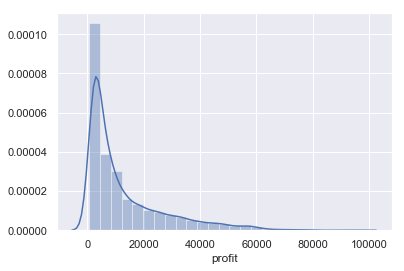

In [161]:
sns.distplot(p.profit, bins = 25)
print("Skew is:", p.profit.skew())
print("Kurtosis: %f" % p.profit.kurt())

Get return days

In [162]:
Tprevious['return_days']=Tprevious.closeddate-Tprevious.approveddate
Tprevious['return_days']=Tprevious['return_days'].apply(lambda x:int(str(x)[:2]))

In [163]:
#extract remaining days
Tprevious.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,set,profit,return_days
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,train,3000.0,16
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,train,3000.0,29
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,train,3800.0,52
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,train,1500.0,14
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,train,1500.0,27


In [164]:
Tprevious['days_left']=Tprevious.termdays-Tprevious.return_days

In [165]:
#Totalprofit
Totalprofit=Tprevious.pivot_table(values='profit',index='customerid',aggfunc=sum)
Totalprofit.rename(columns={'profit':'Totalprofit'},inplace=True)

In [166]:
#Avgprofit
Avgprofit=Tprevious.pivot_table(values='profit',index='customerid',aggfunc=np.mean)
Avgprofit.rename(columns={'profit':'Avgprofit'},inplace=True)

In [167]:
#Avgloanamount
Avgloanamount=Tprevious.pivot_table(values='loanamount',index='customerid',aggfunc=np.mean)
Avgloanamount.rename(columns={'loanamount':'Avgloanamount'},inplace=True)

In [168]:
#Avgtermdays
Avgtermdays=Tprevious.pivot_table(values='termdays',index='customerid',aggfunc=np.mean)
Avgtermdays.rename(columns={'termdays':'Avgtermdays'},inplace=True)

In [169]:
#earlypayment
earlypayment=Tprevious.pivot_table(values='days_left',index='customerid',aggfunc=lambda x:(x>=0).sum())
earlypayment.rename(columns={'days_left':'earlypayment'},inplace=True)


In [170]:
#Avgdaysleft
Avgdaysleft=Tprevious.pivot_table(values='days_left',index='customerid',aggfunc=np.mean)
Avgdaysleft.rename(columns={'days_left':'Avgdaysleft'},inplace=True)

In [171]:
features=[Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment]

In [172]:
features=features[0].join(features[1:])

In [173]:
features.head()

,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment
customerid,,,,,,
8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0
8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3
8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6
8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8
8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2


### Tperfomance

In [174]:
#create a new profit columns

In [175]:
Tperfomance['new_profit']=Tperfomance['totaldue']-Tperfomance['loanamount']

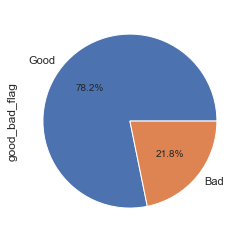

In [176]:
gb=Tperfomance.good_bad_flag.value_counts()
gb.plot(kind="pie",autopct='%1.1f%%')
plt.show()

In [177]:
Tperfomance.drop(columns=['systemloanid','creationdate','approveddate','totaldue'],inplace=True)

## Merge the datasets

In [178]:
#merge data which has attributes from previous loans to performance data
features=pd.merge(features.reset_index(),Tperfomance,how='outer',on='customerid')

In [179]:
#merge data which has attributes from previous & performance loans to demographics data
features=pd.merge(features,Tdemographics,on='customerid',how='inner')

In [180]:
features.columns

Index(['customerid', 'Totalprofit', 'Avgprofit', 'Avgloanamount',
       'Avgtermdays', 'Avgdaysleft', 'earlypayment', 'loannumber',
       'loanamount', 'termdays', 'referredby', 'good_bad_flag', 'set_x',
       'new_profit', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'set_y'],
      dtype='object')

In [181]:
features=features.drop('set_y',axis=1)

In [182]:
features.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,...,set_x,new_profit,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,...,train,1500.0,1989-11-09 00:00:00.000000,Savings,3.351667,6.657019,GT Bank,OJUELEGBA,Permanent,Primary
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,...,train,9000.0,1979-10-18 00:00:00.000000,Other,3.395230,6.592191,Standard Chartered,NaN,Permanent,Graduate
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,...,train,4500.0,1979-01-29 00:00:00.000000,Savings,3.306388,6.651843,GT Bank,MUSHIN BRANCH,Permanent,Graduate
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,...,train,9000.0,1978-11-25 00:00:00.000000,Savings,3.426698,6.423048,First Bank,"17, SANUSI FAFUNWA STREET, VICTORIA ISLAND, LAGOS",Permanent,Secondary
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,...,train,1500.0,1978-04-07 00:00:00.000000,Savings,6.976132,4.801001,GT Bank,"AKUTE,LAGOS.",Permanent,Secondary


We shall not drop GPS instead we normalize the outliers

In [183]:
#remove outliers in GPS 

In [184]:
##to check the percentile in longitude
print(np.nanpercentile(features.longitude_gps,98))
features.longitude_gps.median()

print(np.nanpercentile(features.longitude_gps,2))
features.longitude_gps.median()


##to check the percentile in lat
print(np.nanpercentile(features.latitude_gps,98))
features.latitude_gps.median()

print(np.nanpercentile(features.latitude_gps,2))
features.latitude_gps.median()


8.773581519999997
3.17528492
11.130042259999993
4.82342942


6.6211758000000005

In [185]:
## replacing min and max with 2 and 98 percentile
features.loc[features.longitude_gps <3.17528492, 'longitude_gps']= 3.17528492
features.loc[features.longitude_gps >8.7735815, 'longitude_gps']= 8.7735815
#fill the null values with median
features.longitude_gps.fillna(features.longitude_gps.mean(), inplace = True)

## replacing min and max with 2 and 98 percentile
features.loc[features.latitude_gps <4.82342942, 'latitude_gps']= 4.82342942
features.loc[features['latitude_gps'] > 11.130042 ,'latitude_gps']= 11.130042
features.latitude_gps.fillna(features.latitude_gps.mean(), inplace = True)

In [186]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5821 entries, 0 to 5820
Data columns (total 22 columns):
customerid                    5821 non-null object
Totalprofit                   5804 non-null float64
Avgprofit                     5804 non-null float64
Avgloanamount                 5804 non-null float64
Avgtermdays                   5804 non-null float64
Avgdaysleft                   5804 non-null float64
earlypayment                  5804 non-null float64
loannumber                    5821 non-null int64
loanamount                    5821 non-null float64
termdays                      5821 non-null int64
referredby                    771 non-null object
good_bad_flag                 4371 non-null object
set_x                         5821 non-null object
new_profit                    5821 non-null float64
birthdate                     5821 non-null object
bank_account_type             5821 non-null object
longitude_gps                 5821 non-null float64
latitude_gps        

### Function to calculate percentage of missing values

In [187]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

Check missing values

In [188]:
missing_values_table(features)

Your selected dataframe has 22 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
bank_branch_clients,5756,98.9
referredby,5050,86.8
level_of_education_clients,5025,86.3
good_bad_flag,1450,24.9
employment_status_clients,865,14.9
Totalprofit,17,0.3
Avgprofit,17,0.3
Avgloanamount,17,0.3
Avgtermdays,17,0.3
Avgdaysleft,17,0.3


We have 98.9% branch clients missing.We will drop that column because lat long represents location.We also drop reffered by since it does not have any effect on our prediction

In [189]:
features=features.drop(['bank_branch_clients','referredby'],axis=1)

In [190]:
#term days descriptive analysis

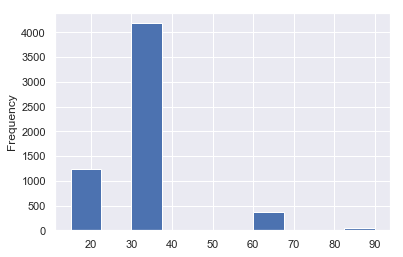

In [191]:
features.termdays.plot.hist(bins=10)

There is an outlier so we might revisit in tuning**

In [192]:
features.level_of_education_clients.value_counts()

Graduate         577
Secondary        118
Post-Graduate     90
Primary           11
Name: level_of_education_clients, dtype: int64

Level of education might be important so we dont drop the column, we fill na with unknown

In [193]:
features.level_of_education_clients.fillna("Unknown",inplace=True)

Employment status

In [194]:
features.employment_status_clients.value_counts()

Permanent        4208
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

In [195]:
features.employment_status_clients=features.employment_status_clients.replace({"Contract":"Unemployed","Retired":"Unemployed"})

In [196]:
features.employment_status_clients=features.employment_status_clients.fillna(features.employment_status_clients.mode()[0])

In [197]:
#Convert birthdate to datetime

In [198]:
features["birthdate"]=pd.to_datetime(features.birthdate)

In [199]:
features.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,Bad,train,1500.0,1989-11-09,Savings,3.351667,6.657019,GT Bank,Permanent,Primary
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,Good,train,9000.0,1979-10-18,Other,3.395230,6.592191,Standard Chartered,Permanent,Graduate
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,Good,train,4500.0,1979-01-29,Savings,3.306388,6.651843,GT Bank,Permanent,Graduate
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,Good,train,9000.0,1978-11-25,Savings,3.426698,6.423048,First Bank,Permanent,Secondary
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,Good,train,1500.0,1978-04-07,Savings,6.976132,4.823429,GT Bank,Permanent,Secondary


In [200]:
##create new column now

In [201]:
import datetime as dt
features['now'] = dt.datetime.now()

In [202]:
features['now'] = features['now'].apply(lambda x : x.year)

In [203]:
#change birth date to year

In [204]:
features['birthdate'] = features['birthdate'].apply(lambda x : x.year)

In [205]:
#create new column age 

In [206]:
features['age']=(features['now']-features['birthdate'])

In [207]:
##Drop birthdate we no longer need it

In [208]:
features=features.drop('birthdate',axis=1)

In [209]:
features.age=pd.cut(features.age,[0,13,31,51,100],labels=[1,2,3,4])

In [210]:
features.age=features.age.astype('int')

In [211]:
features.columns

Index(['customerid', 'Totalprofit', 'Avgprofit', 'Avgloanamount',
       'Avgtermdays', 'Avgdaysleft', 'earlypayment', 'loannumber',
       'loanamount', 'termdays', 'good_bad_flag', 'set_x', 'new_profit',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'now', 'age'],
      dtype='object')

In [212]:
features=features.drop('now',axis=1)

In [213]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5821 entries, 0 to 5820
Data columns (total 20 columns):
customerid                    5821 non-null object
Totalprofit                   5804 non-null float64
Avgprofit                     5804 non-null float64
Avgloanamount                 5804 non-null float64
Avgtermdays                   5804 non-null float64
Avgdaysleft                   5804 non-null float64
earlypayment                  5804 non-null float64
loannumber                    5821 non-null int64
loanamount                    5821 non-null float64
termdays                      5821 non-null int64
good_bad_flag                 4371 non-null object
set_x                         5821 non-null object
new_profit                    5821 non-null float64
bank_account_type             5821 non-null object
longitude_gps                 5821 non-null float64
latitude_gps                  5821 non-null float64
bank_name_clients             5821 non-null object
employment_status_

In [214]:
features.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
0,8a1088a0484472eb01484669e3ce4e0b,1500.0,1500.000000,10000.000000,15.000000,-7.00,0.0,2,10000.0,15,Bad,train,1500.0,Savings,3.351667,6.657019,GT Bank,Permanent,Primary,2
1,8a1a1e7e4f707f8b014f797718316cad,19500.0,4875.000000,17500.000000,37.500000,6.25,3.0,5,30000.0,60,Good,train,9000.0,Other,3.395230,6.592191,Standard Chartered,Permanent,Graduate,3
2,8a1a32fc49b632520149c3b8fdf85139,16500.0,2357.142857,12857.142857,19.285714,1.00,6.0,8,20000.0,30,Good,train,4500.0,Savings,3.306388,6.651843,GT Bank,Permanent,Graduate,3
3,8a1eb5ba49a682300149c3c068b806c7,32400.0,4050.000000,16250.000000,33.750000,5.25,8.0,9,30000.0,60,Good,train,9000.0,Savings,3.426698,6.423048,First Bank,Permanent,Secondary,3
4,8a1edbf14734127f0147356fdb1b1eb2,4500.0,2250.000000,10000.000000,22.500000,4.50,2.0,3,10000.0,15,Good,train,1500.0,Savings,6.976132,4.823429,GT Bank,Permanent,Secondary,3


C:\Users\ktmbugua\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


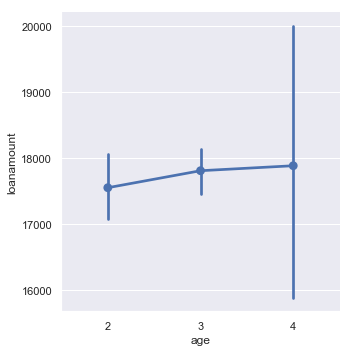

In [222]:
# plt.figure(figsize=(12,12))
sns.factorplot(data=features, x="age", y="loanamount",estimator=np.average)
# Unnecessary 

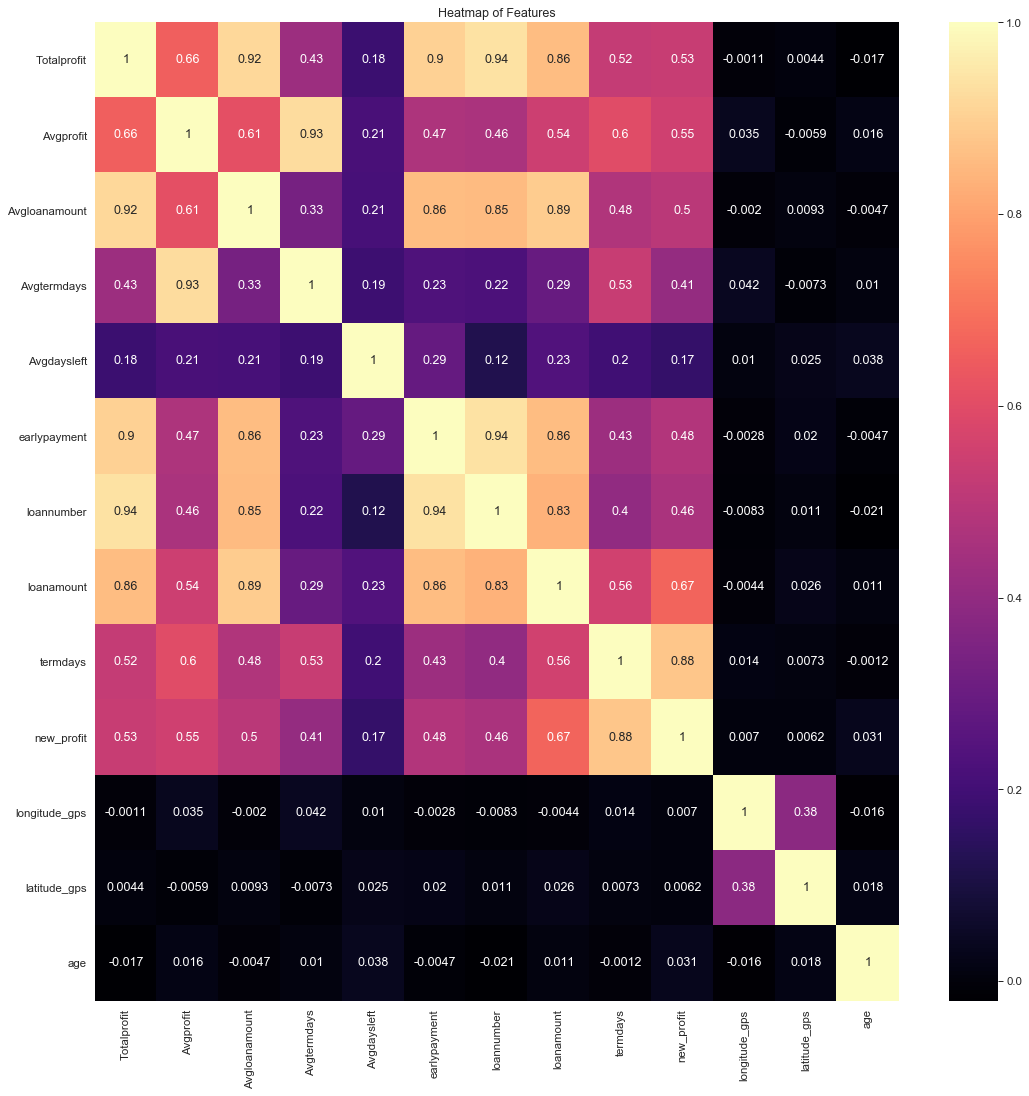

In [237]:
plt.figure(figsize=(18,18))
sns.heatmap(features.corr(), annot=True, cmap='magma')
plt.title("Heatmap of Features")
sns.set_context(context="paper",font_scale=1.5)
plt.savefig("Heatmap")

### Transform skewed numeric features

In [118]:
#log transform skewed numeric features:
numeric_feats = features.dtypes[(features.dtypes != "object") & (features.dtypes !='category')].index

skewed_feats = features[numeric_feats].apply(lambda x: pd.DataFrame.skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

features[skewed_feats] = np.log1p(features[skewed_feats])


C:\Users\ktmbugua\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


In [119]:
features.dtypes.value_counts()

float64    12
object      7
int32       1
dtype: int64

### impute mode

In [120]:
catfeats_fillnamode=['good_bad_flag']
features.loc[:, catfeats_fillnamode] = \
    features[catfeats_fillnamode].fillna(features[catfeats_fillnamode].mode().iloc[0])

### impute 0

In [121]:
features['Totalprofit']=features.Totalprofit.fillna(0)

In [122]:
features['Avgprofit']=features.Avgprofit.fillna(0)

In [123]:
features['Avgloanamount']=features.Avgloanamount.fillna(0)

In [124]:
features['Avgtermdays']=features.Avgtermdays.fillna(0)

In [125]:
features['Avgdaysleft']=features.Avgdaysleft.fillna(0)

In [126]:
features['earlypayment']=features.earlypayment.fillna(0)

### Label Encoding function

In [127]:
features.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
0,8a1088a0484472eb01484669e3ce4e0b,7.313887,1500.000000,9.210440,15.000000,-7.00,0.000000,1.098612,9.210440,2.772589,Bad,train,7.313887,Savings,1.470559,2.035623,GT Bank,Permanent,Primary,2
1,8a1a1e7e4f707f8b014f797718316cad,9.878221,4875.000000,9.770013,37.500000,6.25,1.386294,1.791759,10.308986,4.110874,Good,train,9.105091,Other,1.480520,2.027120,Standard Chartered,Permanent,Graduate,3
2,8a1a32fc49b632520149c3b8fdf85139,9.711176,2357.142857,9.461733,19.285714,1.00,1.945910,2.197225,9.903538,3.433987,Good,train,8.412055,Savings,1.460100,2.034947,GT Bank,Permanent,Graduate,3
3,8a1eb5ba49a682300149c3c068b806c7,10.385945,4050.000000,9.695910,33.750000,5.25,2.197225,2.302585,10.308986,4.110874,Good,train,9.105091,Savings,1.487654,2.004590,First Bank,Permanent,Secondary,3
4,8a1edbf14734127f0147356fdb1b1eb2,8.412055,2250.000000,9.210440,22.500000,4.50,1.098612,1.386294,9.210440,2.772589,Good,train,7.313887,Savings,2.076454,1.761889,GT Bank,Permanent,Secondary,3


In [128]:
features.columns

Index(['customerid', 'Totalprofit', 'Avgprofit', 'Avgloanamount',
       'Avgtermdays', 'Avgdaysleft', 'earlypayment', 'loannumber',
       'loanamount', 'termdays', 'good_bad_flag', 'set_x', 'new_profit',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'age'],
      dtype='object')

In [129]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for ures
var_mod = ["good_bad_flag","bank_account_type", "bank_account_type", "bank_name_clients" ,"employment_status_clients" ,"level_of_education_clients"]

for i in var_mod:
    features[i] = le.fit_transform(features[i])

### Seperate the datasets

In [130]:
#Divide into test and train:
train = features.loc[features['set_x']=="train"]
test = features.loc[features['set_x']=="test"]
#Drop unnecessary columns:
#features.drop(['SalePrice','set'],axis=1,inplace=True)


In [131]:
train.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
0,8a1088a0484472eb01484669e3ce4e0b,7.313887,1500.000000,9.210440,15.000000,-7.00,0.000000,1.098612,9.210440,2.772589,0,train,7.313887,2,1.470559,2.035623,6,0,2,2
1,8a1a1e7e4f707f8b014f797718316cad,9.878221,4875.000000,9.770013,37.500000,6.25,1.386294,1.791759,10.308986,4.110874,1,train,9.105091,1,1.480520,2.027120,11,0,0,3
2,8a1a32fc49b632520149c3b8fdf85139,9.711176,2357.142857,9.461733,19.285714,1.00,1.945910,2.197225,9.903538,3.433987,1,train,8.412055,2,1.460100,2.034947,6,0,0,3
3,8a1eb5ba49a682300149c3c068b806c7,10.385945,4050.000000,9.695910,33.750000,5.25,2.197225,2.302585,10.308986,4.110874,1,train,9.105091,2,1.487654,2.004590,5,0,3,3
4,8a1edbf14734127f0147356fdb1b1eb2,8.412055,2250.000000,9.210440,22.500000,4.50,1.098612,1.386294,9.210440,2.772589,1,train,7.313887,2,2.076454,1.761889,6,0,3,3


In [132]:
test.head()

,customerid,Totalprofit,Avgprofit,Avgloanamount,Avgtermdays,Avgdaysleft,earlypayment,loannumber,loanamount,termdays,good_bad_flag,set_x,new_profit,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age
6,8a28afc7474813a40147639ec637156b,10.401258,3290.000000,9.787010,31.5,6.000000,2.302585,2.484907,10.126671,3.433987,1,test,7.824446,1,1.469902,2.015717,6,0,4,3
12,8a3735d5518aba7301518ac34413010d,9.798183,3000.000000,9.364577,27.5,13.333333,1.791759,2.079442,9.903538,3.433987,1,test,8.412055,1,1.477551,2.031275,6,0,0,3
18,8a76e7d443e6e97c0143ed099d102b1d,8.006701,1500.000000,9.210440,15.0,1.500000,1.098612,1.945910,9.903538,3.433987,1,test,8.412055,1,1.474281,2.020469,17,0,4,3
21,8a818823525dceef01525deda2480384,10.596035,4441.666667,9.846382,40.0,0.777778,1.945910,2.397895,10.596660,4.110874,1,test,8.987322,2,2.086258,1.767613,5,1,0,3
23,8a818926522ea5ef01523aff15c37482,8.699681,3000.000000,9.210440,30.0,-10.500000,0.000000,1.386294,9.903538,3.433987,1,test,8.412055,2,2.041627,1.975320,1,0,3,3


In [133]:
test.drop(['set_x'],axis=1,inplace=True)
train.drop(['set_x'],axis=1,inplace=True)
#Export files as modified versions:
train.to_csv("cleaned/train_modified.csv",index=False)
test.to_csv("cleaned/test_modified.csv",index=False)

C:\Users\ktmbugua\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned/train_modified.csv'

## Modelling

In [134]:
train_df = pd.read_csv('cleaned/train_modified.csv')
test_df = pd.read_csv('cleaned/test_modified.csv')

#Define target and ID columns:
target = 'good_bad_flag'


FileNotFoundError: File b'cleaned/train_modified.csv' does not exist

In [135]:
train_ids = train_df['customerid']
test_ids = test_df['customerid']

NameError: name 'train_df' is not defined

In [186]:
train_df.drop(['customerid','loannumber'],axis=1,inplace=True)

In [187]:
test_df.drop(['customerid','loannumber',target],axis=1,inplace=True)

In [188]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 16 columns):
Totalprofit                   1450 non-null float64
Avgprofit                     1450 non-null float64
Avgloanamount                 1450 non-null float64
Avgtermdays                   1450 non-null float64
Avgdaysleft                   1450 non-null float64
earlypayment                  1450 non-null float64
loanamount                    1450 non-null float64
termdays                      1450 non-null float64
new_profit                    1450 non-null float64
bank_account_type             1450 non-null int64
longitude_gps                 1450 non-null float64
latitude_gps                  1450 non-null float64
bank_name_clients             1450 non-null int64
employment_status_clients     1450 non-null int64
level_of_education_clients    1450 non-null int64
age                           1450 non-null int64
dtypes: float64(11), int64(5)
memory usage: 181.3 KB


We align the dataframes by the columns. This ensures we have the same columns in the training and testing datasets.

In [189]:
train_df, test_df = train_df.align(test, join = 'inner', axis = 1)
print('Training shape: ', train_df.shape)
print('Testing shape: ', test_df.shape)

Training shape:  (4371, 17)
Testing shape:  (1450, 17)


### Feature correlation

In [190]:
# Find all correlations and sort 
correlations_data = train_df.corr()['good_bad_flag'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

bank_account_type            -0.093027
longitude_gps                -0.023968
level_of_education_clients   -0.018823
latitude_gps                  0.000025
employment_status_clients     0.000581
bank_name_clients             0.005840
termdays                      0.007271
Avgtermdays                   0.017129
new_profit                    0.023474
Avgprofit                     0.051860
age                           0.068944
Avgloanamount                 0.075708
Totalprofit                   0.089400
loanamount                    0.125429
earlypayment                  0.194822
Name: good_bad_flag, dtype: float64 

level_of_education_clients   -0.018823
latitude_gps                  0.000025
employment_status_clients     0.000581
bank_name_clients             0.005840
termdays                      0.007271
Avgtermdays                   0.017129
new_profit                    0.023474
Avgprofit                     0.051860
age                           0.068944
Avgloanamount             

In [194]:
train_df.columns

Index(['Totalprofit', 'Avgprofit', 'Avgloanamount', 'Avgtermdays',
       'Avgdaysleft', 'earlypayment', 'loanamount', 'termdays',
       'good_bad_flag', 'new_profit', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'age'],
      dtype='object')

In [195]:
X=train_df.drop('good_bad_flag',axis=1)
y=train_df['good_bad_flag']
x_test=test_df

In [196]:
x_train,x_valid,y_train,y_valid=train_test_split(X, y, test_size=0.2,random_state=7)

### Function to measure the models performance

In [197]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    #ax.set_facecolor("k")
 

In [198]:
rdmforest = RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.7634285714285715
Recall score   :  0.8246318607764391
classification report :
               precision    recall  f1-score   support

           0       0.28      0.41      0.33       128
           1       0.89      0.82      0.86       747

   micro avg       0.76      0.76      0.76       875
   macro avg       0.59      0.62      0.60       875
weighted avg       0.80      0.76      0.78       875



/home/dobvinci/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


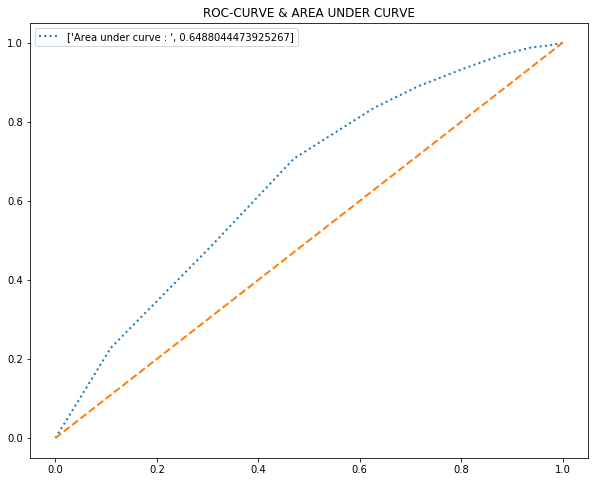

In [199]:
model(rdmforest,x_train,y_train,x_valid,y_valid,x_train.columns)

In [200]:
gdboost = GradientBoostingClassifier()

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Accuracy score :  0.7977142857142857
Recall score   :  0.8182941903584673
classification report :
               precision    recall  f1-score   support

           0       0.20      0.55      0.29        66
           1       0.96      0.82      0.88       809

   micro avg       0.80      0.80      0.80       875
   macro avg       0.58      0.68      0.59       875
weighted avg       0.90      0.80      0.84       875



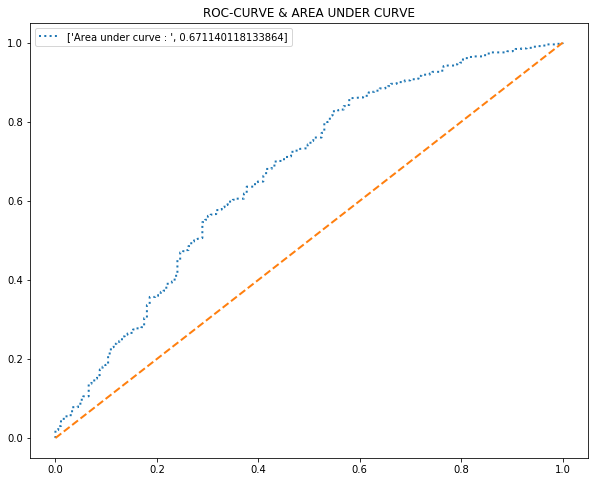

In [201]:
model(gdboost,x_train,y_train,x_valid,y_valid,x_train.columns)

In [202]:
gnb=GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy score :  0.7302857142857143
Recall score   :  0.8285302593659942
classification report :
               precision    recall  f1-score   support

           0       0.35      0.35      0.35       181
           1       0.83      0.83      0.83       694

   micro avg       0.73      0.73      0.73       875
   macro avg       0.59      0.59      0.59       875
weighted avg       0.73      0.73      0.73       875



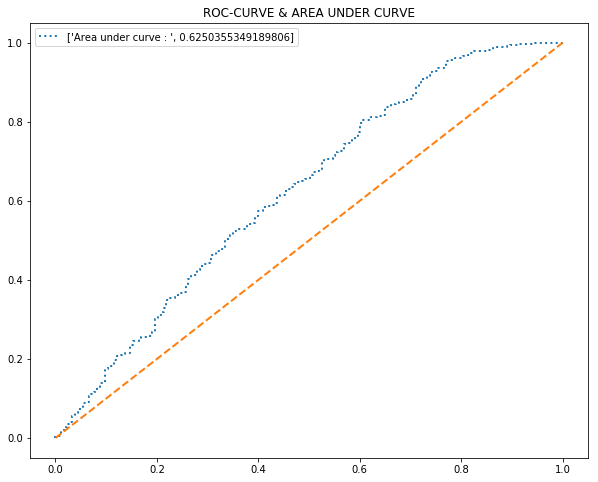

In [203]:
model(gnb,x_train,y_train,x_valid,y_valid,x_train.columns)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy score :  0.792
Recall score   :  0.8163771712158809
classification report :
               precision    recall  f1-score   support

           0       0.19      0.51      0.28        69
           1       0.95      0.82      0.88       806

   micro avg       0.79      0.79      0.79       875
   macro avg       0.57      0.66      0.58       875
weighted avg       0.89      0.79      0.83       875



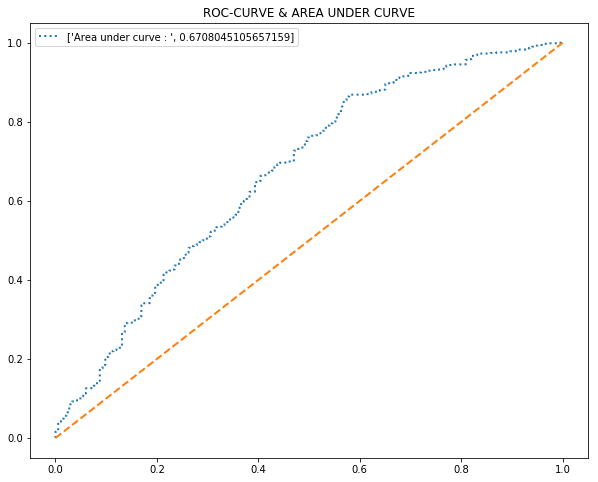

In [204]:
xgb = XGBClassifier()
model(xgb,x_train,y_train,x_valid,y_valid,x_train.columns)

In [205]:
test_df.drop('good_bad_flag',inplace=True,axis=1)

In [208]:
submission = pd.DataFrame()
submission['customerid'] = test_ids
submission['Good_Bad_flag'] = gdboost.predict(test_df).astype('int')
submission.to_csv('submission2_vnjagi.csv', index=False)

## My score was 0.206896551724138 Ranked 7th